### Data Description:
   .                   The data contains some features. 3 type of vehicles's part is used for the analysis. "BUS,CAR and VAN". Need to find out how the data is distingushing where CAR's parts have almost double data than others.

### Context: 
Dataset has different aspects according to their parts type. It will be analyzed by many different angles.

### Domain:
Object's Part recognition

### Attribute Information:

● All the features are geometric features extracted from the dataset  
● All are numeric in nature 


### Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

### Invoking Important dependencies

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Listing the files ( CSV or excel )

In [2]:
file=[]
for fl in os.listdir():
    if fl.endswith(".xlsx") or fl.endswith(".csv"):
        file.append(fl)
print(file)

['vehicle.csv']


### Reading the file

In [3]:
for read in file:
    if read.endswith(".csv"):
        df=pd.read_csv(read)
        break
    else:
        df=pd.read_excel(read)
        break
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


### Shape of Dataset

In [4]:
df.shape

(846, 19)

### Information of datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### Uniques Values present in every columns

In [6]:
df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

### Description of Dataset

In [7]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [9]:
#df.loc[df.duplicated(keep=False), :]
df.duplicated().unique()

array([False])

###  Imputation :-

####        No need to perform this operation as data doesn't contain any duplicacy

In [10]:
# df1 = df.drop_duplicates()  # No duplicacy found so leave this code 

### following rows contaion Null values

In [11]:
df[df.isnull().any(axis=1)]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus


### Total num of null values in every columns -

In [12]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### Sum of total null values present in dataset

In [13]:
# Total Null values are in dataset
df.isnull().sum().sum()

41

#### Num of rows contain null values are 

In [14]:
df[df.isnull().any(axis=1)].shape

(33, 19)

In [15]:
# Just checking

df_van = df[df['class']=='van']
df_bus = df[df['class']=='bus']
df_car = df[df['class']=='car']

print(df_van[df_van.isnull().any(axis=1)].shape)
print(df_bus[df_bus.isnull().any(axis=1)].shape)
print(df_car[df_car.isnull().any(axis=1)].shape)

(4, 19)
(13, 19)
(16, 19)


In [16]:
# selecting last column 
#cls=df.iloc[:,-1:]

### Clustering of target feature:

In [17]:
col_class = df.columns[-1]
cls_val = df[df.columns[-1]].unique()
print(col_class)
print(type(cls_val),cls_val)

class
<class 'numpy.ndarray'> ['van' 'car' 'bus']


In [18]:
print(df['circularity'][df['class']=='van'].median())
print(df[df['class']=='van']['circularity'].median())

42.0
42.0


#### first select the column then apply filter otherwise it will show the output but  null value filling operation will not performed

In [19]:
for i in df.columns[df.isnull().any(axis=0)]:
    for k in cls_val:
        df[i][df[col_class]==k] = df[i][df[col_class]==k].fillna(df[i][df[col_class]==k].median())

### After filled null values with median 
### Checking Null values in respective columns:-

In [20]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [21]:
df.duplicated().sum()

0

### Data description after Imputation :-

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.00,100.00,119.0
circularity,846.0,44.826241,6.134340,33.0,40.00,44.00,49.00,59.0
distance_circularity,846.0,82.066194,15.754263,40.0,70.00,80.00,98.00,112.0
radius_ratio,846.0,168.916076,33.427561,104.0,141.00,167.25,195.00,333.0
pr.axis_aspect_ratio,846.0,61.680851,7.882557,47.0,57.00,61.00,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.00,10.00,55.0
scatter_ratio,846.0,168.920804,33.199802,112.0,147.00,157.00,198.00,265.0
elongatedness,846.0,40.927896,7.813401,26.0,33.00,43.00,46.00,61.0
pr.axis_rectangularity,846.0,20.579196,2.590879,17.0,19.00,20.00,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.00,159.00,188.0


### Data Visualization -

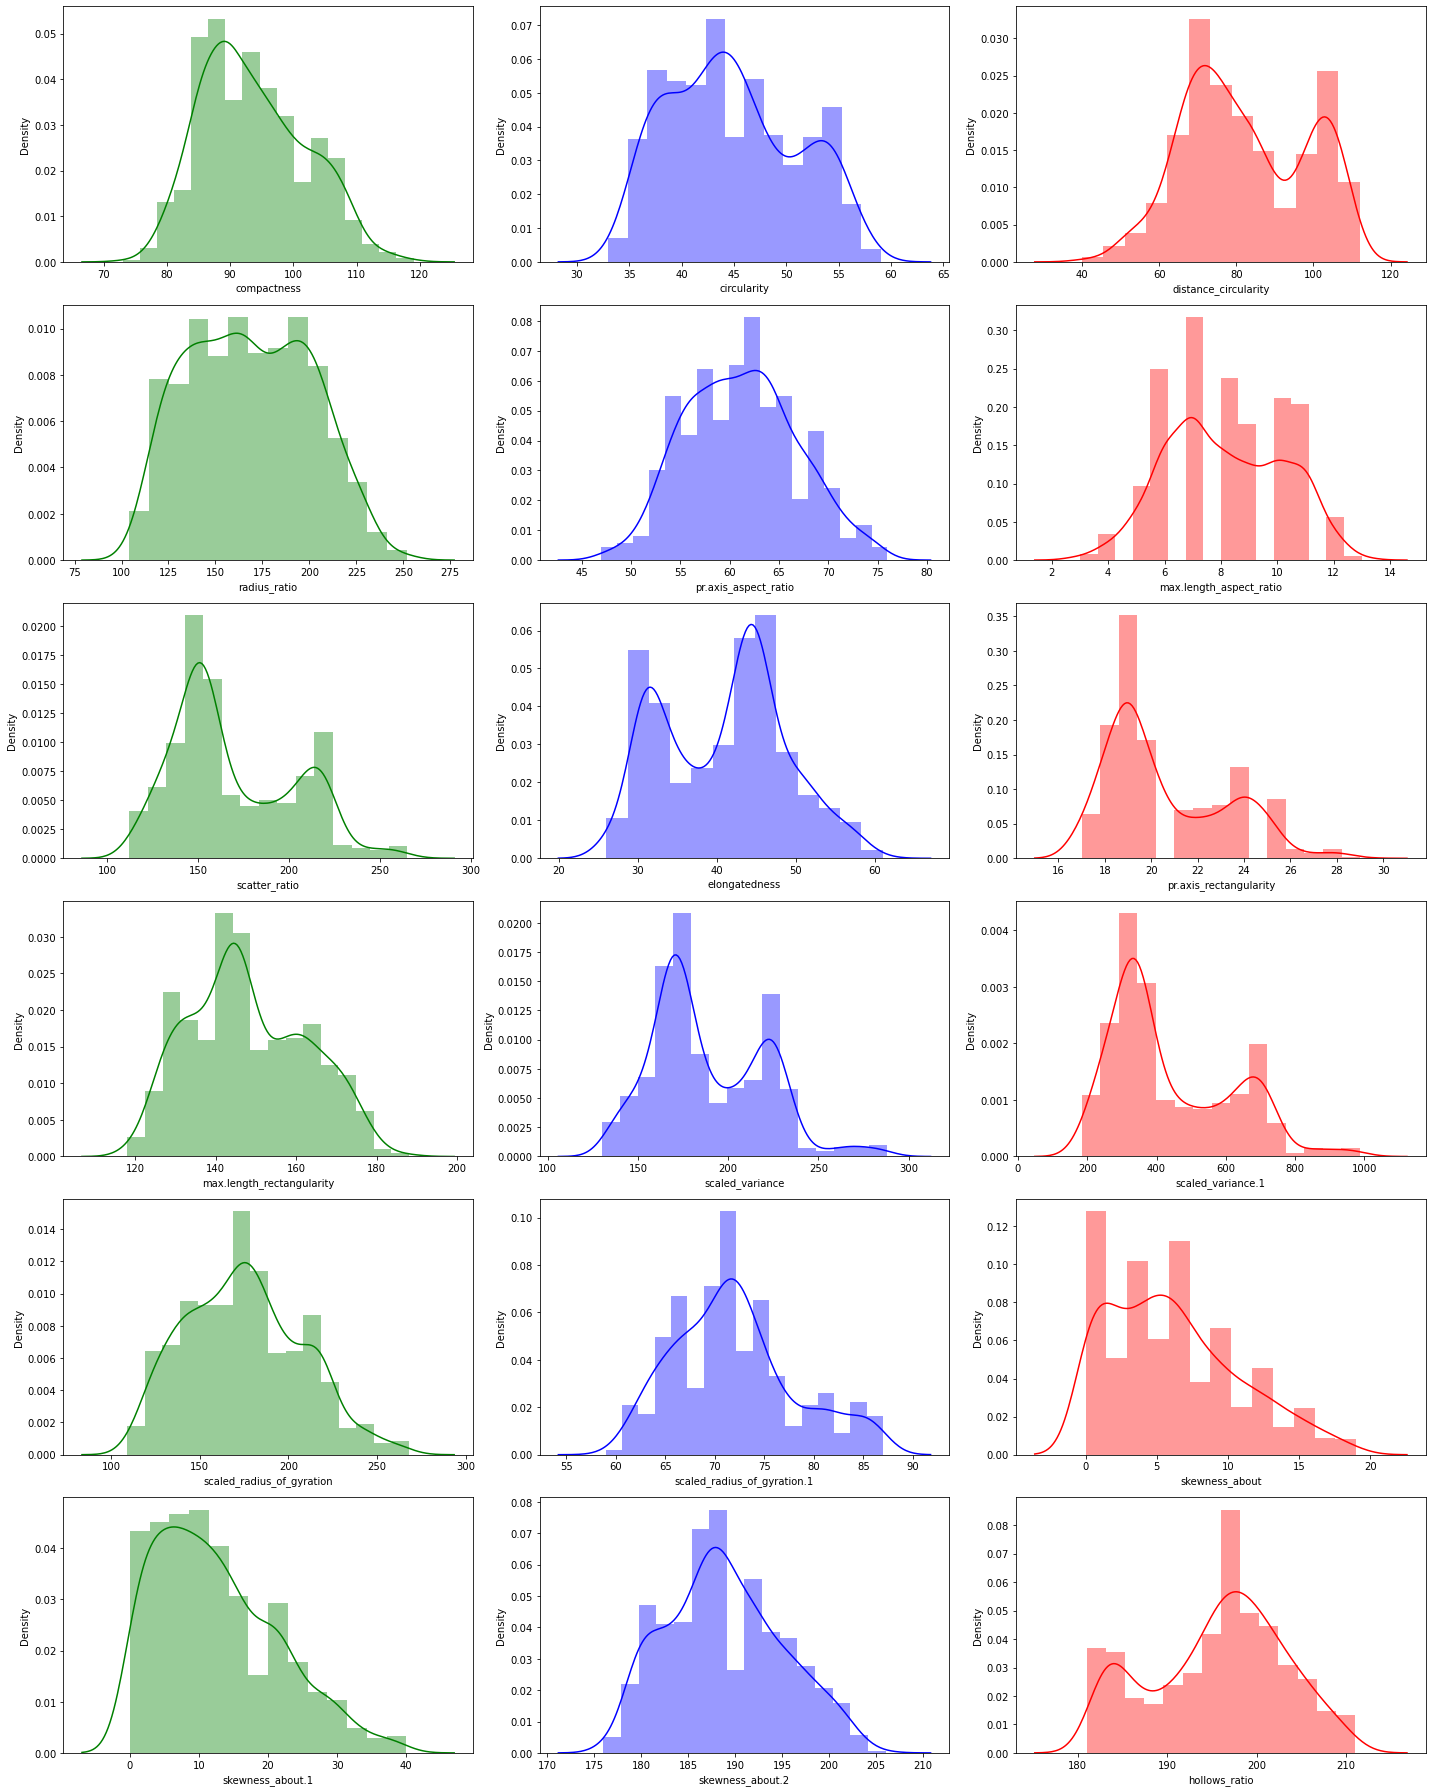

In [53]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(20,25))
colors = {0:'g', 1:'b', 2:'r'}
for i, column in enumerate(df.iloc[:,:-1].columns):
    sns.distplot(df[column],ax=axes[i//3,i%3],color=colors[i%3])
    plt.tight_layout()

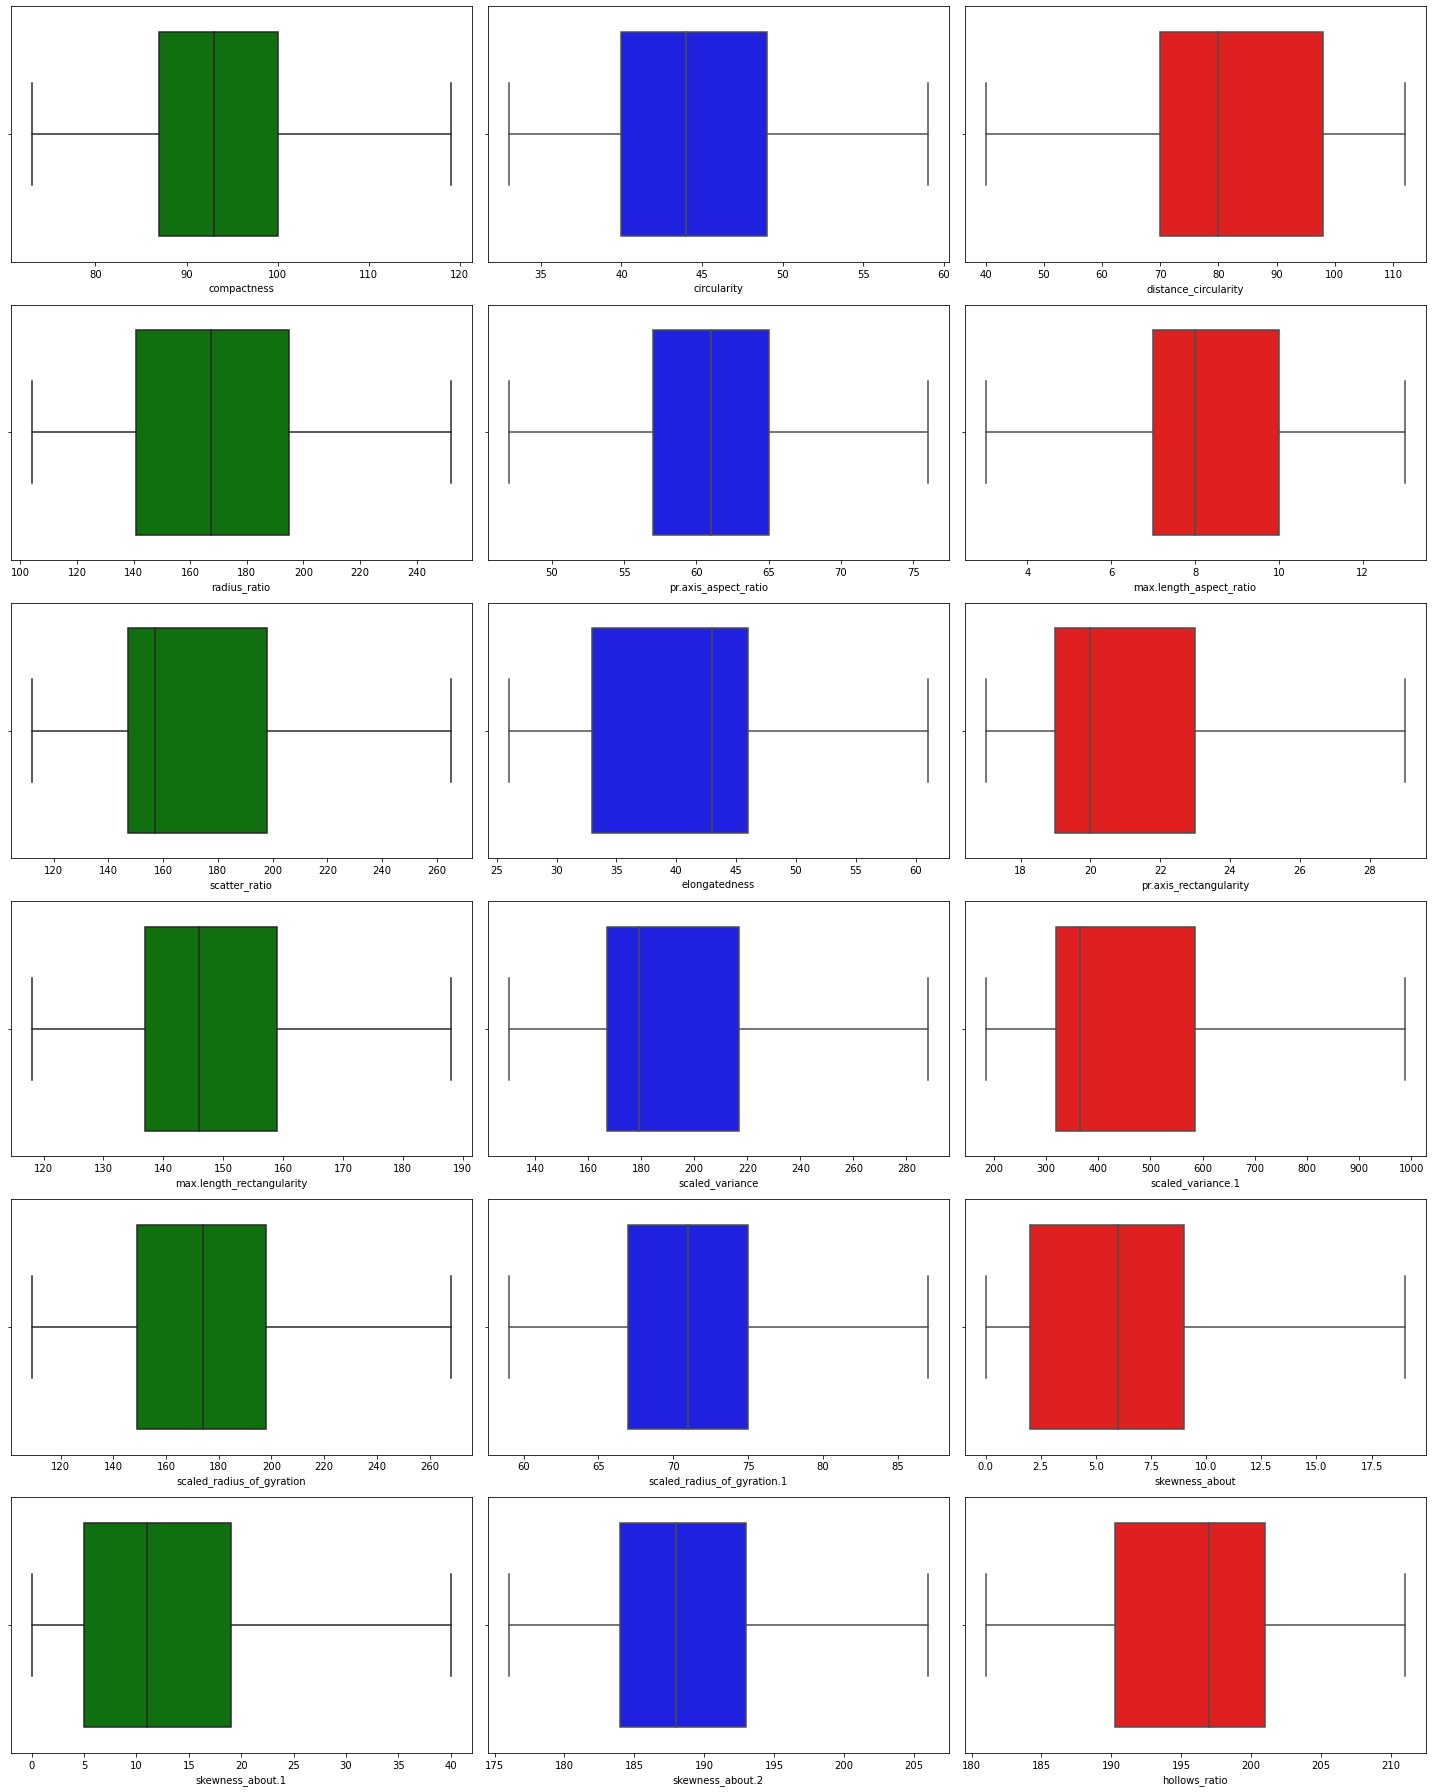

In [54]:
fig, axes = plt.subplots(nrows=6, ncols=3,figsize=(20,25))
colors = {0:'g', 1:'b', 2:'r'}
for i, column in enumerate(df.iloc[:,:-1].columns):
    sns.boxplot(df[column],ax=axes[i//3,i%3],color=colors[i%3])
    plt.tight_layout()

### Outliers detection function 

In [25]:
from scipy import stats
from scipy.stats import zscore, norm

def outlier_plot(df,col):
    
    # defining figure size
    plt.figure(figsize=(15,8))
    
    #histogram
    plt.subplot(1,3,1)
    sns.distplot(df[col],fit=norm,rug=True)
    plt.axvline(df[col].mean(),linestyle="dashed",label="mean", color='blue')
    plt.axvline(df[col].median(),linestyle="dashed",label="median", color='red')
    plt.legend()
    
    #QQ plot
    plt.subplot(1,3,2)
    stats.probplot(df[col], dist="norm", plot=plt)
    
    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df[col])
     
    plt.show()
    
    Q1,Q3 = np.quantile(df[col],0.25),np.quantile(df[col],0.75)
    
    # calculation of IQR- Inter-Quantile RAnge
    IQR = Q3 - Q1
    
    # calculation of  outlier cut-off
    cut_off = IQR * 1.5
    
    #calculation  of lower and upper value
    lower,upper = Q1-cut_off,Q3+cut_off
    print("IQR :",IQR)
    print("Lower bound :",lower)
    print("Upper bound:",upper)
    print("")
    
    #calculation of number of outliers
    
    count = df[df[col] < lower].shape[0] + df[df[col] > upper].shape[0] 
    print("Number of outliers:",count)
    print("Outliers (in %):",round((count/df.shape[0])*100,2))
    
    if count > 0:
        df[col] = np.where(df[col] > upper,df[col].mean(),np.where(df[col] < lower,df[col].mean(),df[col]))
        
        # defining figure size
        plt.figure(figsize=(15,6))
    
        #histogram
        plt.subplot(1,3,1)
        sns.distplot(df[col],fit=norm,rug=True)
        plt.axvline(df[col].mean(),linestyle="dashed",label="mean", color='green')
        plt.axvline(df[col].median(),linestyle="dashed",label="median", color='blue')
        plt.legend()
    
        #QQ plot
        plt.subplot(1,3,2)
        stats.probplot(df[col], dist="norm", plot=plt)
    
        #Boxplot
        plt.subplot(1,3,3)
        sns.boxplot(df[col])
    
        plt.show()

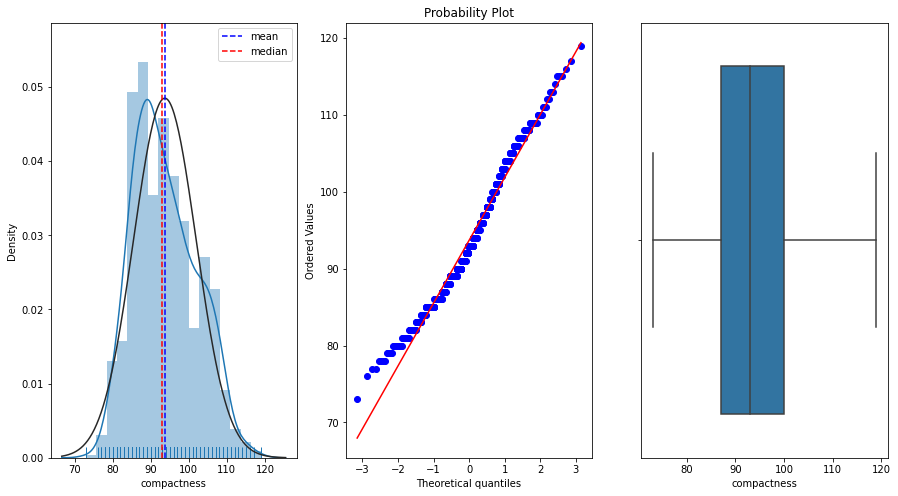

IQR : 13.0
Lower bound : 67.5
Upper bound: 119.5

Number of outliers: 0
Outliers (in %): 0.0


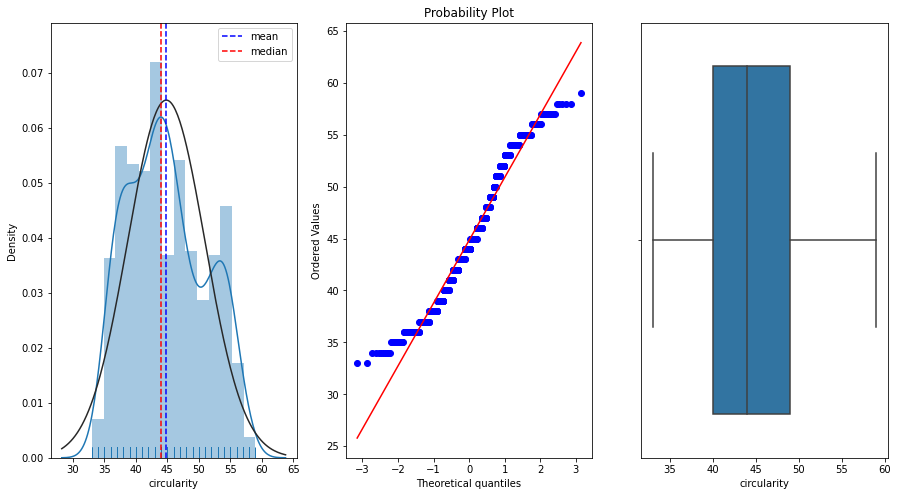

IQR : 9.0
Lower bound : 26.5
Upper bound: 62.5

Number of outliers: 0
Outliers (in %): 0.0


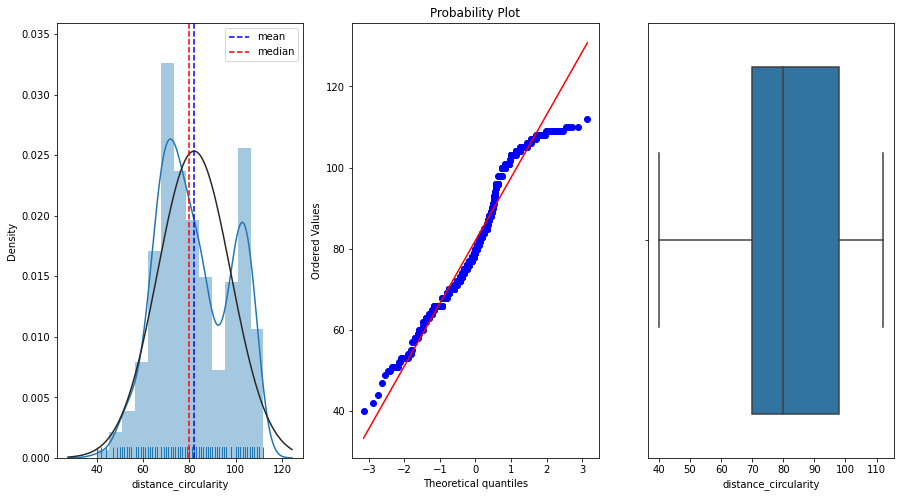

IQR : 28.0
Lower bound : 28.0
Upper bound: 140.0

Number of outliers: 0
Outliers (in %): 0.0


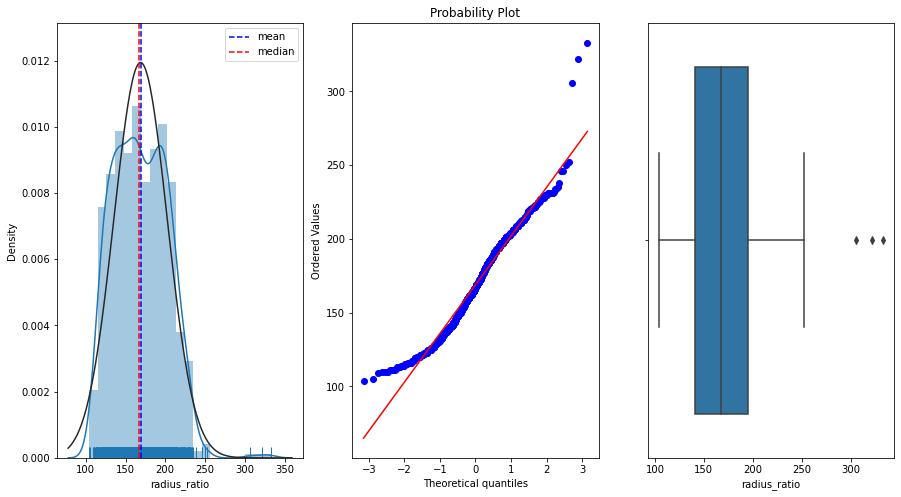

IQR : 54.0
Lower bound : 60.0
Upper bound: 276.0

Number of outliers: 3
Outliers (in %): 0.35


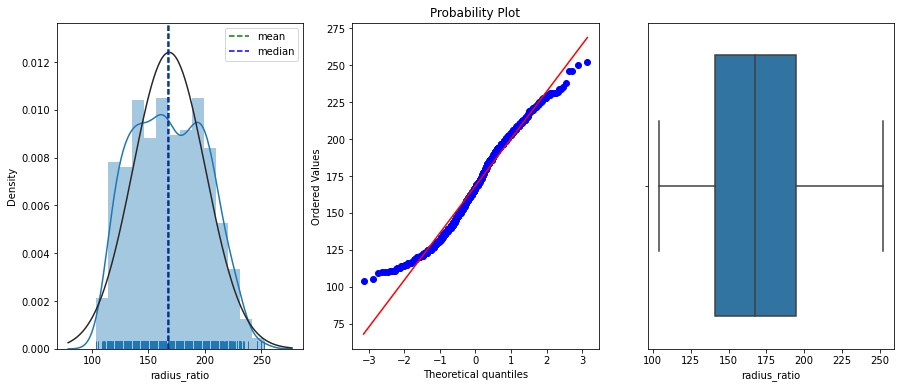

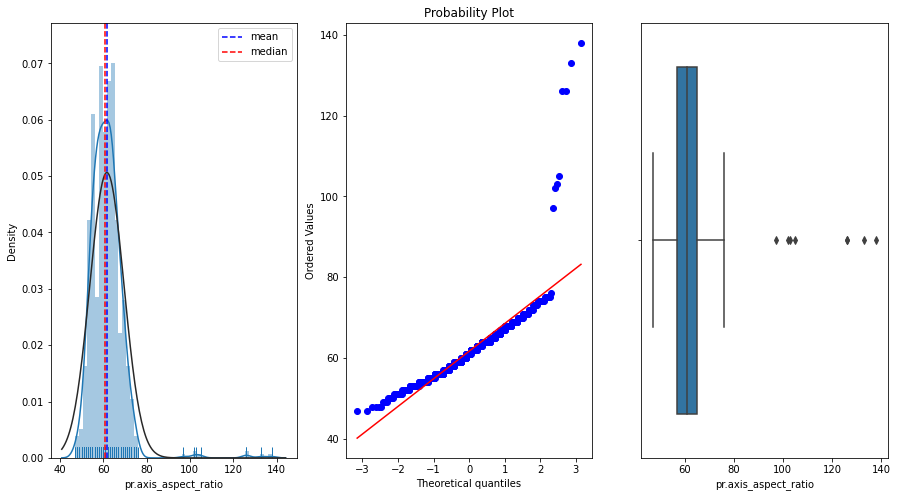

IQR : 8.0
Lower bound : 45.0
Upper bound: 77.0

Number of outliers: 8
Outliers (in %): 0.95


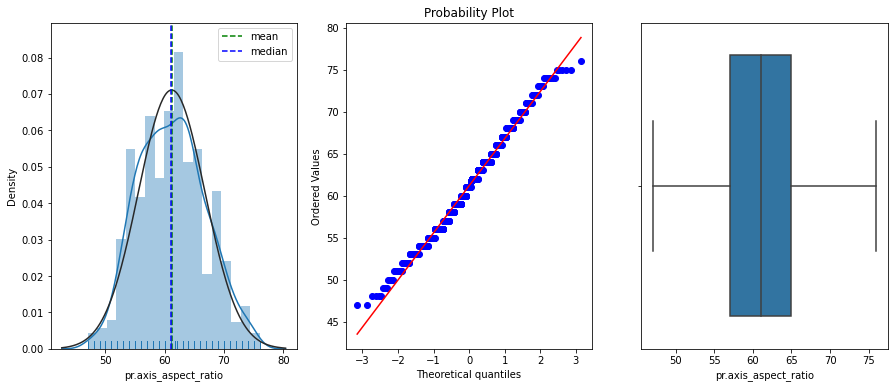

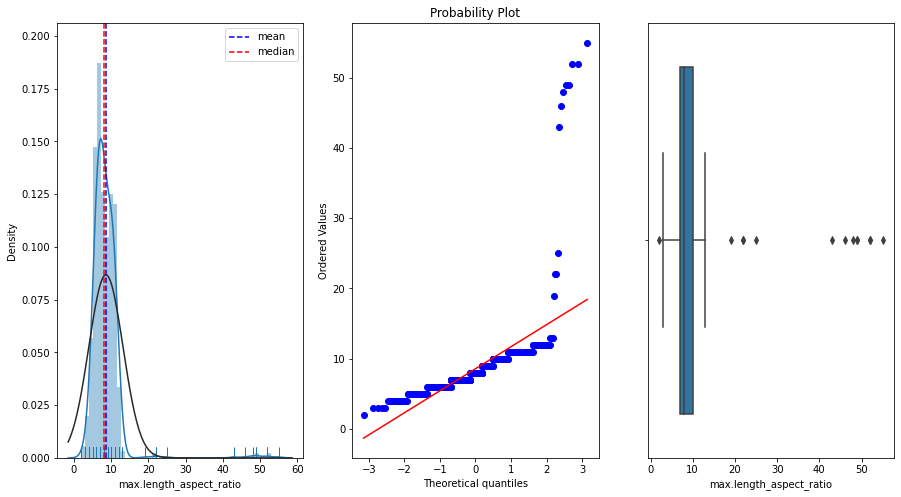

IQR : 3.0
Lower bound : 2.5
Upper bound: 14.5

Number of outliers: 13
Outliers (in %): 1.54


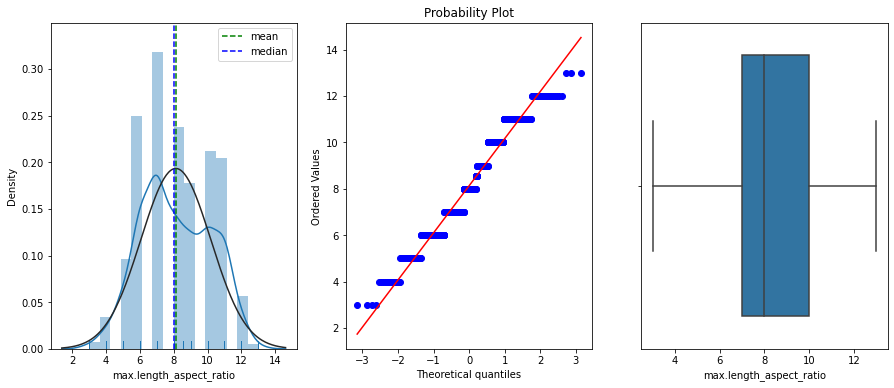

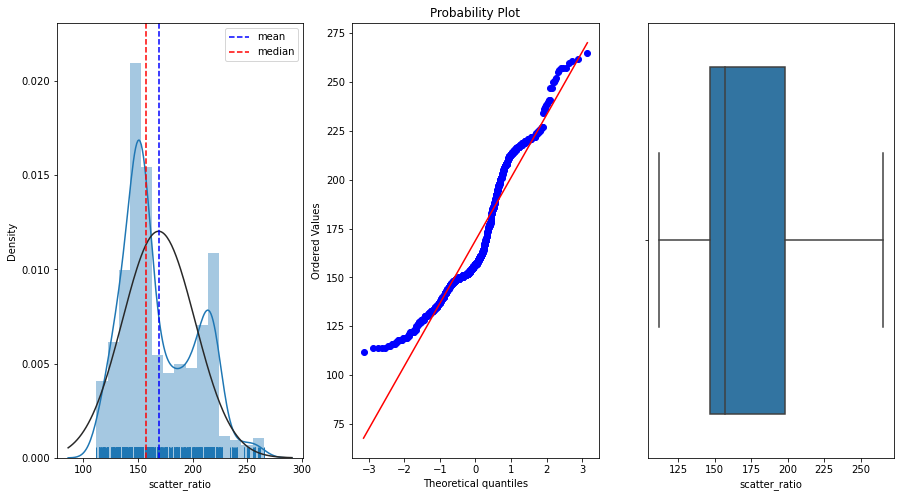

IQR : 51.0
Lower bound : 70.5
Upper bound: 274.5

Number of outliers: 0
Outliers (in %): 0.0


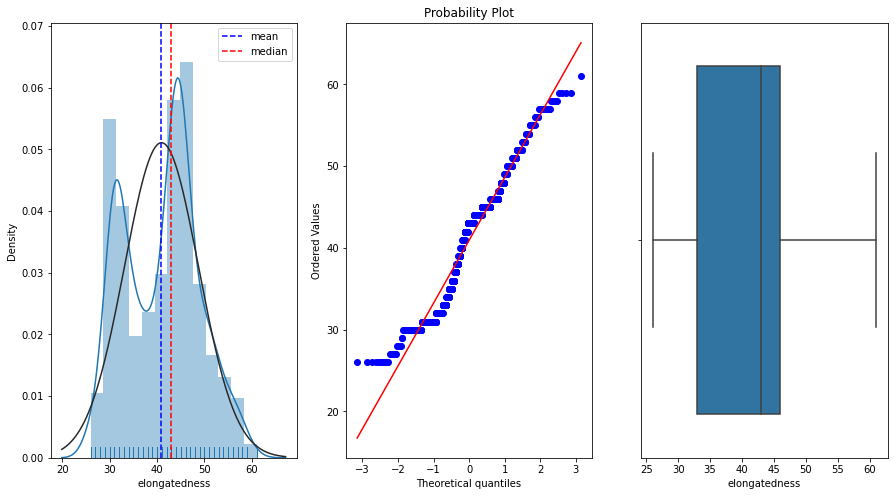

IQR : 13.0
Lower bound : 13.5
Upper bound: 65.5

Number of outliers: 0
Outliers (in %): 0.0


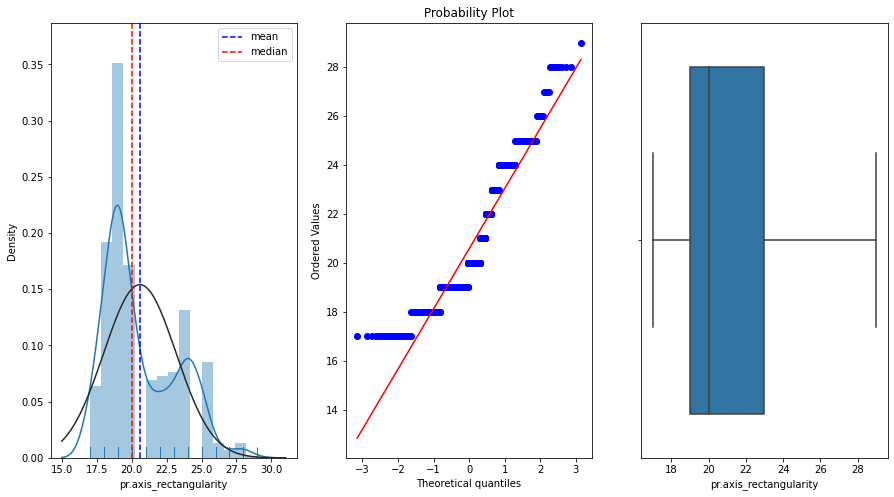

IQR : 4.0
Lower bound : 13.0
Upper bound: 29.0

Number of outliers: 0
Outliers (in %): 0.0


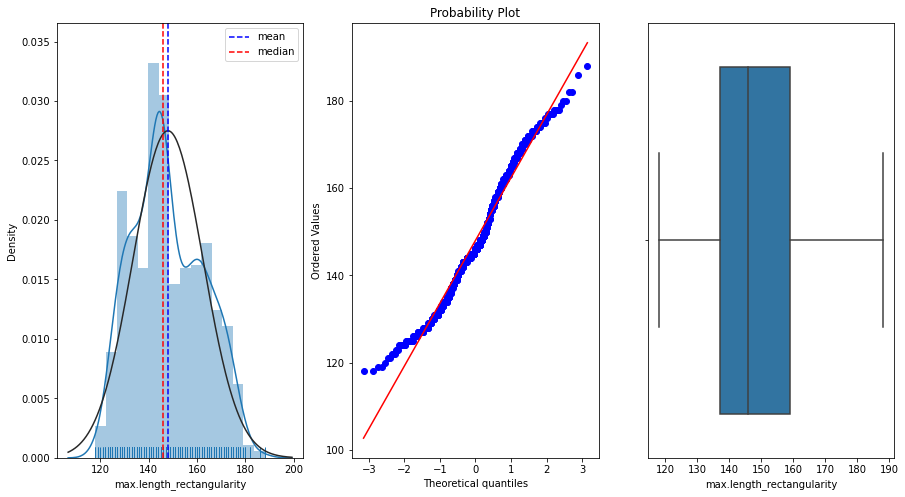

IQR : 22.0
Lower bound : 104.0
Upper bound: 192.0

Number of outliers: 0
Outliers (in %): 0.0


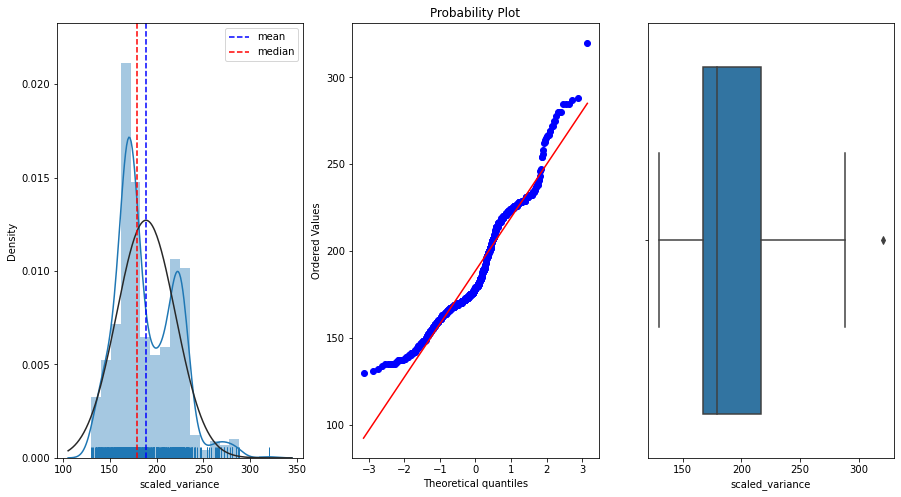

IQR : 50.0
Lower bound : 92.0
Upper bound: 292.0

Number of outliers: 1
Outliers (in %): 0.12


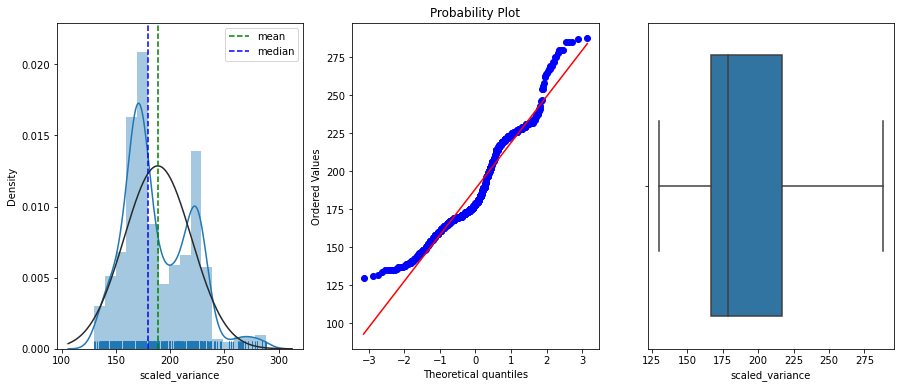

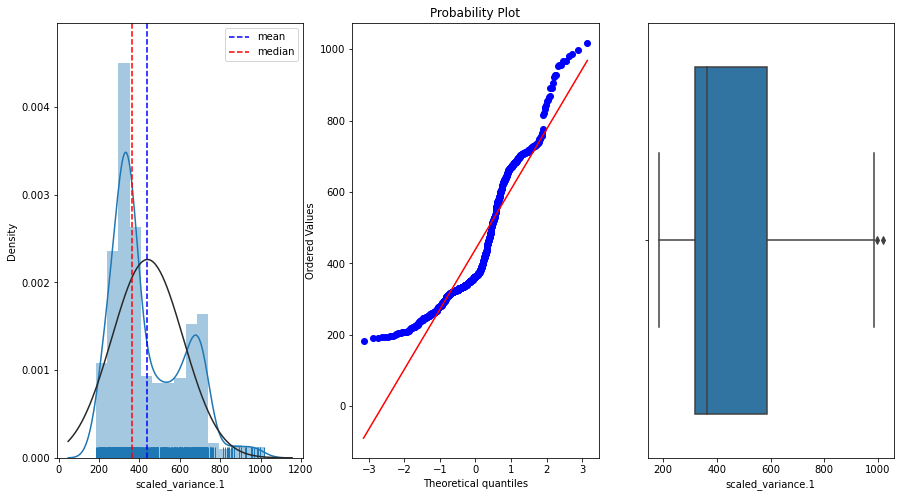

IQR : 268.5
Lower bound : -84.5
Upper bound: 989.5

Number of outliers: 2
Outliers (in %): 0.24


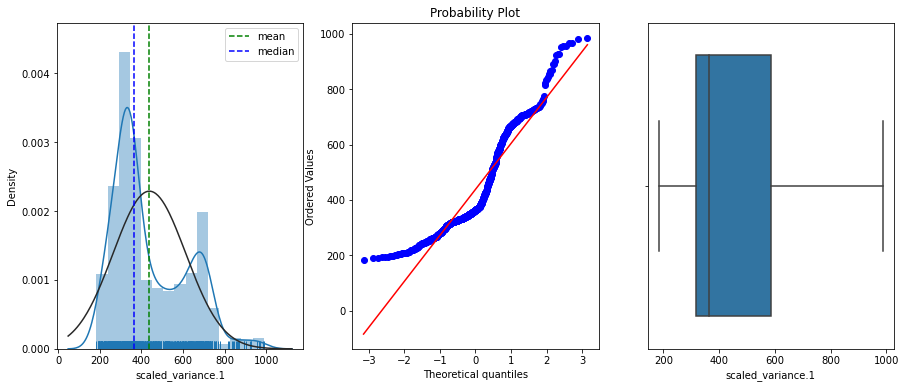

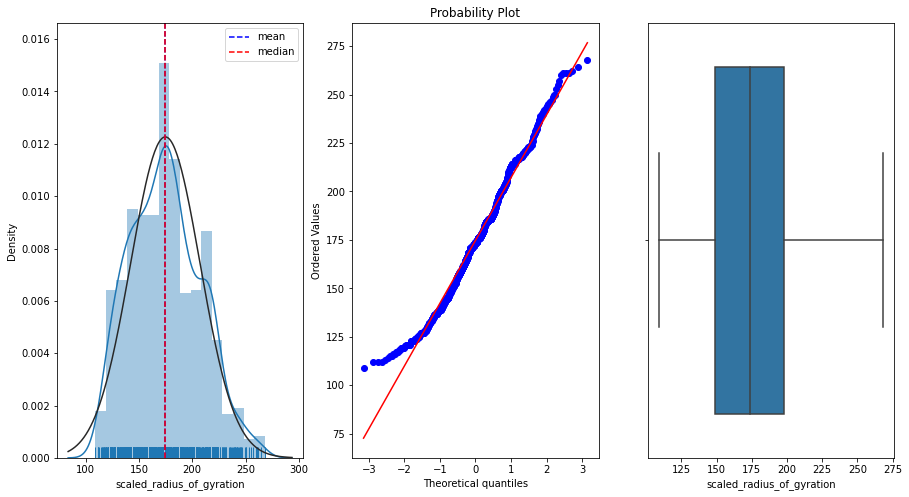

IQR : 49.0
Lower bound : 75.5
Upper bound: 271.5

Number of outliers: 0
Outliers (in %): 0.0


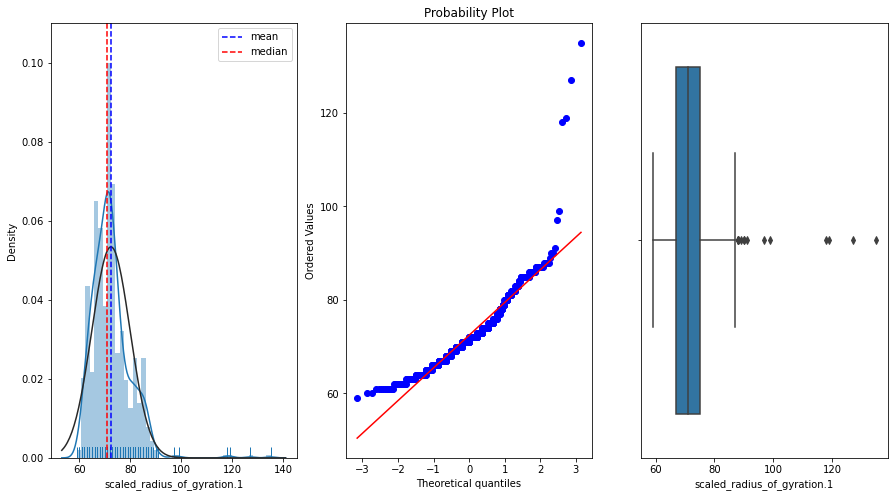

IQR : 8.0
Lower bound : 55.0
Upper bound: 87.0

Number of outliers: 15
Outliers (in %): 1.77


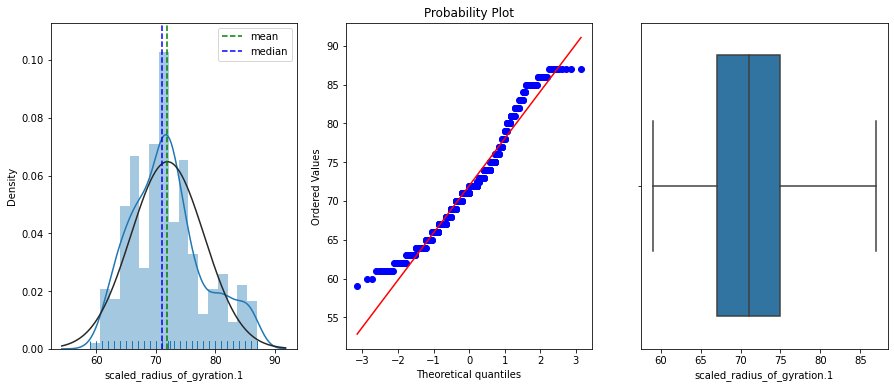

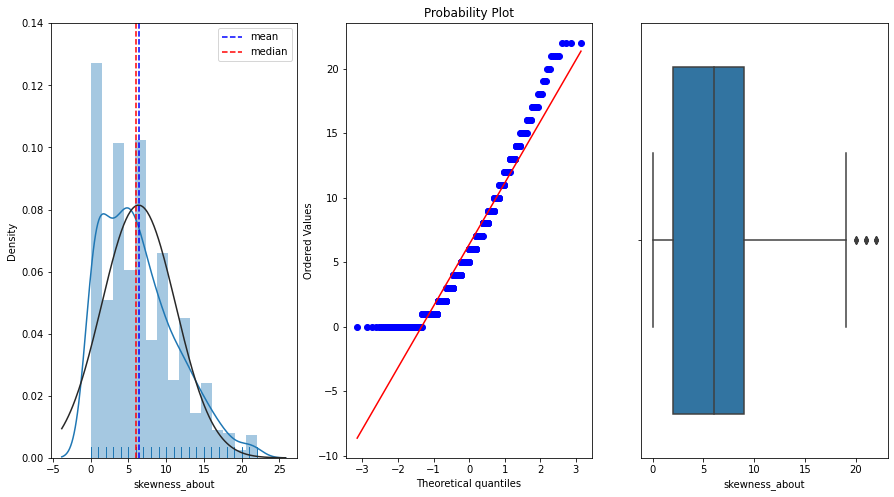

IQR : 7.0
Lower bound : -8.5
Upper bound: 19.5

Number of outliers: 12
Outliers (in %): 1.42


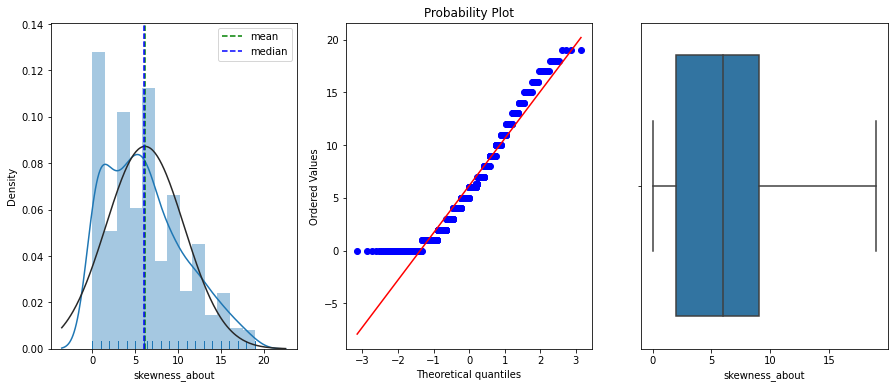

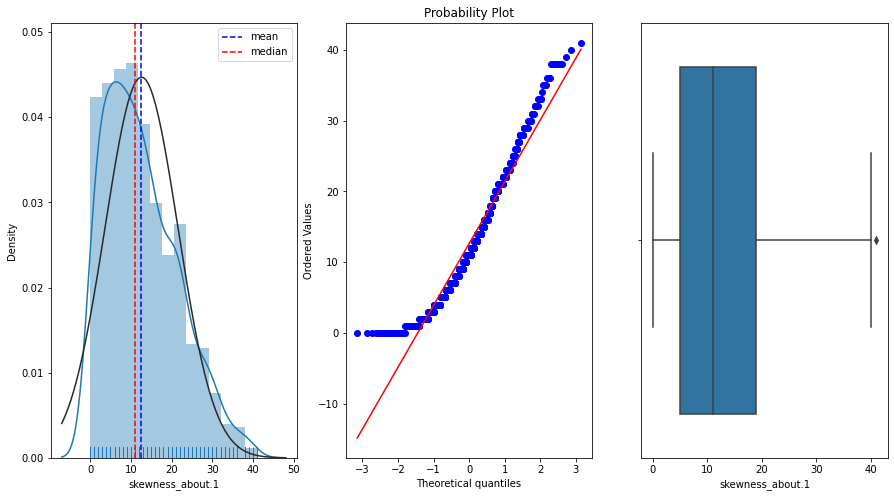

IQR : 14.0
Lower bound : -16.0
Upper bound: 40.0

Number of outliers: 1
Outliers (in %): 0.12


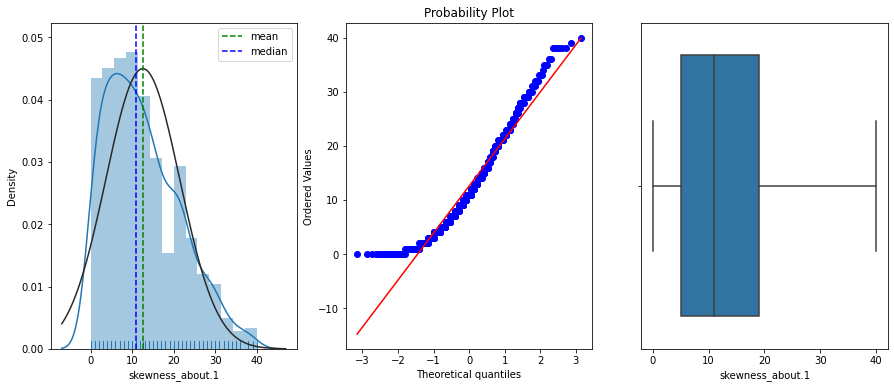

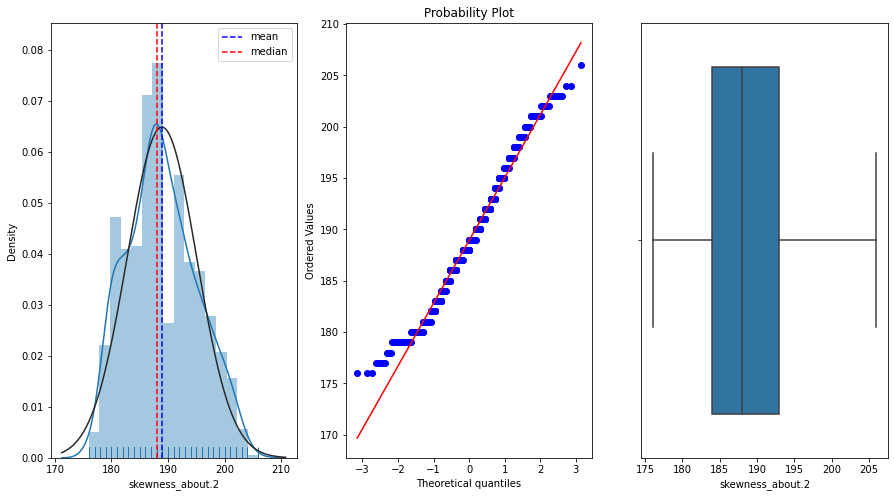

IQR : 9.0
Lower bound : 170.5
Upper bound: 206.5

Number of outliers: 0
Outliers (in %): 0.0


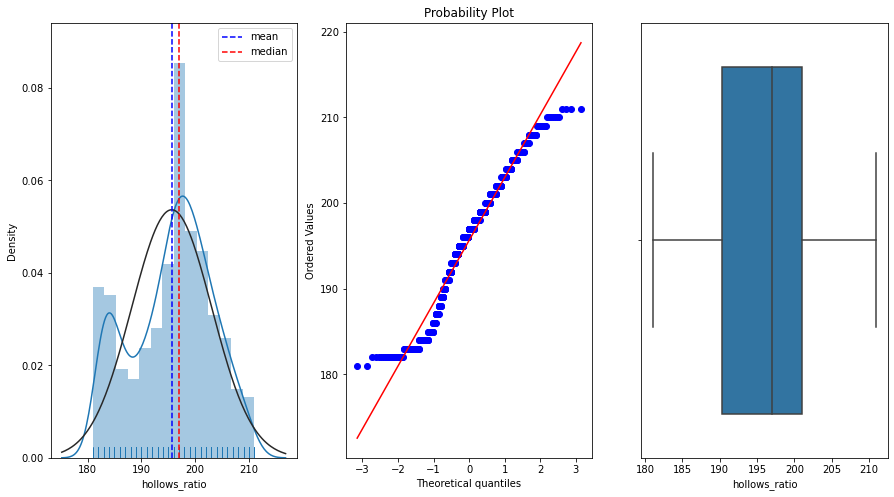

IQR : 10.75
Lower bound : 174.125
Upper bound: 217.125

Number of outliers: 0
Outliers (in %): 0.0


In [26]:
columns = list(df.iloc[:,:-1])
for col in columns:
    outlier_plot(df,col)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.00,100.00,119.0
circularity,846.0,44.826241,6.134340,33.0,40.00,44.00,49.00,59.0
distance_circularity,846.0,82.066194,15.754263,40.0,70.00,80.00,98.00,112.0
radius_ratio,846.0,168.379135,32.175745,104.0,141.00,167.25,194.75,252.0
pr.axis_aspect_ratio,846.0,61.164831,5.614512,47.0,57.00,61.00,65.00,76.0
max.length_aspect_ratio,846.0,8.126922,2.064796,3.0,7.00,8.00,10.00,13.0
scatter_ratio,846.0,168.920804,33.199802,112.0,147.00,157.00,198.00,265.0
elongatedness,846.0,40.927896,7.813401,26.0,33.00,43.00,46.00,61.0
pr.axis_rectangularity,846.0,20.579196,2.590879,17.0,19.00,20.00,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.00,159.00,188.0


###  Correlation - (Heat Map):

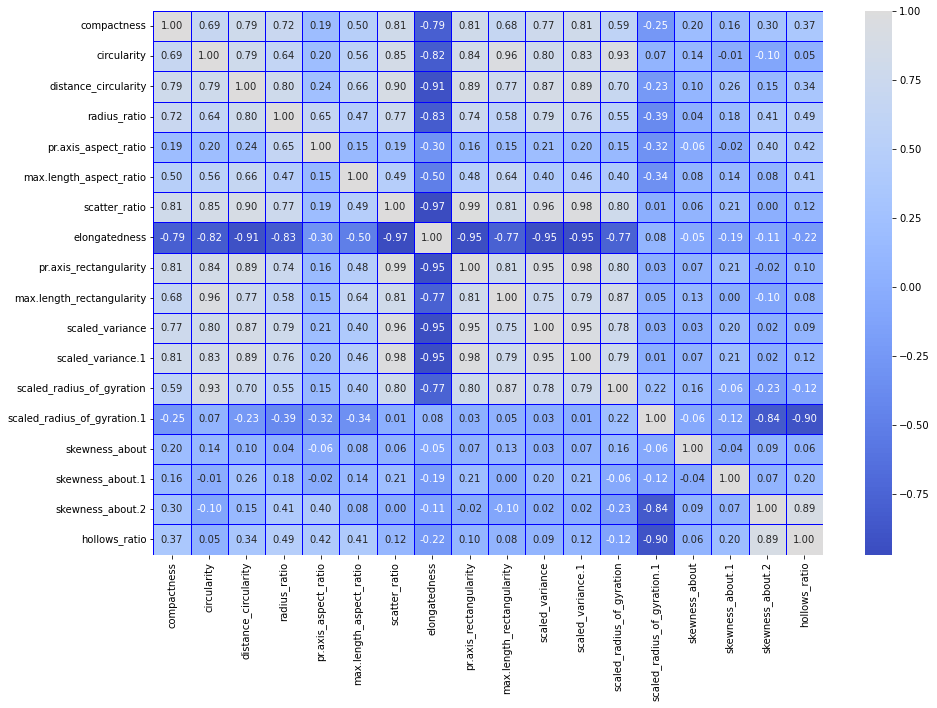

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=1.0,linecolor="b", fmt= '.2f', center = 1,cmap="coolwarm")  # heatmap
plt.show()

### Feature Selection -

#### Important columns are identifying among variables. Removing the variables which has more than 0.9 dependencies.

In [29]:
columns = np.full((df.corr().shape[0],),True, dtype=bool)
for i in range(df.corr().shape[0]):
    for j in range(i+1, df.corr().shape[0]):
        if df.corr().iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
feat_col = df.iloc[:,:-1].columns[columns]
data = df[feat_col]
data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,elongatedness,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.000000,10.000000,42.0,70.000000,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.000000,9.000000,45.0,72.000000,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.000000,10.000000,32.0,73.000000,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.000000,9.000000,46.0,63.000000,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,61.680851,8.567376,45.0,72.443262,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.000000,8.000000,40.0,72.000000,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.000000,11.000000,43.0,72.000000,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.000000,12.000000,30.0,70.000000,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.000000,7.000000,50.0,66.000000,0.0,25.0,190.0,195


In [30]:
# List of selected feature 
print(data.columns,len(data.columns))

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'elongatedness',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object') 12


In [31]:
print(len(data.values))
print(len(zscore(data).values))

846
846


In [32]:
#Shape of Target data
df.iloc[:,-1:].shape

(846, 1)

### Test Data and Target Data

In [33]:
#Applying Z-score for Standarization
std_data = zscore(data).values

# df.iloc[:,-1:] --This is for target data

In [34]:
# Model selection-
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [35]:
x_train, x_test, y_train, y_test = train_test_split(std_data, df.iloc[:,-1:], test_size = 0.25, random_state=42)

print("Shape of data:-")
print("x-train shape:-",x_train.shape,"\ty-train shape:-",y_train.shape)
print("x-test shape",x_test.shape,"\t\ty-test shape",y_test.shape)

Shape of data:-
x-train shape:- (634, 12) 	y-train shape:- (634, 1)
x-test shape (212, 12) 		y-test shape (212, 1)


In [36]:
# The default kernel used by SVC is the "rbf"
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [37]:
prediction = svc.predict(x_test)

In [38]:
cm = confusion_matrix(y_test, prediction)
summ = 0
for i in range(cm.shape[0]):
    summ += cm[i][i]
    
accuracy = summ/x_test.shape[0]
print(accuracy)
print("Accuracy for SVC before implementation of PCA:- ","{:.2f}".format(accuracy*100),"%")

0.9669811320754716
Accuracy for SVC before implementation of PCA:-  96.70 %


### K-Fold Cross Validation :-

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
# prepare the cross-validation procedure
for i in range(2,21):
    cv = KFold(n_splits=i, shuffle=True, random_state=42)
    accur_k_fold = cross_val_score(svc, x_train, y_train,cv=cv)
    print(accur_k_fold.mean()*100)
    print(accur_k_fold.std())
    print("Accuracy for K-Fold cross-validation:- ","{:.2f}".format(accur_k_fold.mean()*100),"%","at k =",i)
    print("***********----------------***************")

93.69085173501577
0.0031545741324921495
Accuracy for K-Fold cross-validation:-  93.69 % at k = 2
***********----------------***************
92.7456854153626
0.0057420068102588045
Accuracy for K-Fold cross-validation:-  92.75 % at k = 3
***********----------------***************
93.84603136692938
0.014454584689875377
Accuracy for K-Fold cross-validation:-  93.85 % at k = 4
***********----------------***************
94.3207099112611
0.021392068336249133
Accuracy for K-Fold cross-validation:-  94.32 % at k = 5
***********----------------***************
94.94908655286015
0.02174132996121149
Accuracy for K-Fold cross-validation:-  94.95 % at k = 6
***********----------------***************
94.15838130123845
0.027012317398294027
Accuracy for K-Fold cross-validation:-  94.16 % at k = 7
***********----------------***************
94.31962025316456
0.027463017367817418
Accuracy for K-Fold cross-validation:-  94.32 % at k = 8
***********----------------***************
93.68209255533199
0.03371367

## PCA -
It is use to reduce the dimension of data if data has many feature. But in this dataset 
I've already selected 12 feature by aplplication of PCA it will give 7 features that will effect minimal on accuracy score


In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca.fit(std_data)
PCA_std_data=pca.transform(std_data)
PCA_std_data.shape

(846, 7)

In [42]:
x_train, x_test, y_train, y_test= train_test_split(PCA_std_data,df.iloc[:,-1:], test_size= 0.25, random_state=42)
svc=SVC() # The default kernel used by SVC is "rbf"
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)

In [43]:
cm = confusion_matrix(y_test, prediction)
summ = 0
for i in range(cm.shape[0]):
    summ += cm[i][i]
    
accu_PCA = summ/x_test.shape[0]
print(accu_PCA)
print("\nAccuracy for SVC AFTER implementation of PCA:-\t","{:.2f}".format(accu_PCA*100),"%")

0.9433962264150944

Accuracy for SVC AFTER implementation of PCA:-	 94.34 %


In [44]:
# prepare the cross-validation procedure
for i in range(2,21):
    cv = KFold(n_splits=i, shuffle=True, random_state=42)
    accur_k_fold = cross_val_score(svc, x_train, y_train,cv=cv)
    print(accur_k_fold.mean()*100)
    print("STD VARIATION",accur_k_fold.std())
    print("Accuracy for K-Fold cross-validation:- ","{:.2f}".format(accur_k_fold.mean()*100),"%","at k =",i)
    print("--------------------------------")

89.90536277602523
STD VARIATION 0.009463722397476337
Accuracy for K-Fold cross-validation:-  89.91 % at k = 2
--------------------------------
89.58910846821068
STD VARIATION 0.014007032549591068
Accuracy for K-Fold cross-validation:-  89.59 % at k = 3
--------------------------------
90.37596528938778
STD VARIATION 0.011485609551499493
Accuracy for K-Fold cross-validation:-  90.38 % at k = 4
--------------------------------
90.22122234720659
STD VARIATION 0.0037450291681091195
Accuracy for K-Fold cross-validation:-  90.22 % at k = 5
--------------------------------
90.06439053608867
STD VARIATION 0.02363708295402075
Accuracy for K-Fold cross-validation:-  90.06 % at k = 6
--------------------------------
89.90057561486134
STD VARIATION 0.02559891457563481
Accuracy for K-Fold cross-validation:-  89.90 % at k = 7
--------------------------------
90.53797468354429
STD VARIATION 0.027357521725345155
Accuracy for K-Fold cross-validation:-  90.54 % at k = 8
--------------------------------


In [50]:
score = {
    'data' : ['Raw-data', 'PCA'],
    'SVC_Score' : [accuracy,accu_PCA],
    'Cross_Validation' : ["0.94949086"+"  - k=6","0.90859213"+' - k=14'],
}
  
# creating a Dataframe object 
sco = pd.DataFrame(score)
  
sco

,data,SVC_Score,Cross_Validation
0,Raw-data,0.966981,0.94949086 - k=6
1,PCA,0.943396,0.90859213 - k=14
